In [1]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 3.4 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 3.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.6 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.6 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 8.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master


requirements: Ultralytics requirement ['urllib3>=2.5.0 ; python_version > "3.8"'] not found, attempting AutoUpdate...
WARNING Retry 1/2 failed: Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING Retry 2/2 failed: Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING requirements:  Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.


YOLOv5  2025-11-28 Python-3.13.5 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [42]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_mas

In [7]:
import uuid   # Unique identifier
import os
import time

In [19]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20 #pick how much image you want to train

In [20]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [21]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [23]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Suhas': Invalid argument
YOLOv5  2025-9-29 Python-3.13.5 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, wa

In [5]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Suhas S/.cache\torch\hub\master.zip
requirements: Ultralytics requirement ['urllib3>=2.5.0 ; python_version > "3.8"'] not found, attempting AutoUpdate...
WARNING Retry 1/2 failed: Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING Retry 2/2 failed: Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.
WARNING requirements:  Command 'pip install --no-cache-dir "urllib3>=2.5.0 ; python_version > "3.8"" ' returned non-zero exit status 2.


YOLOv5  2025-12-1 Python-3.13.5 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [8]:
img = os.path.join('data', 'images', 'awake.2ecb3c70-9d1b-11f0-b226-687a64d3f1c0.jpg')

In [9]:
results = model(img)

C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [10]:
results.print()

image 1/1: 480x640 1 awake
Speed: 45.0ms pre-process, 19.6ms inference, 60.7ms NMS per image at shape (1, 3, 480, 640)


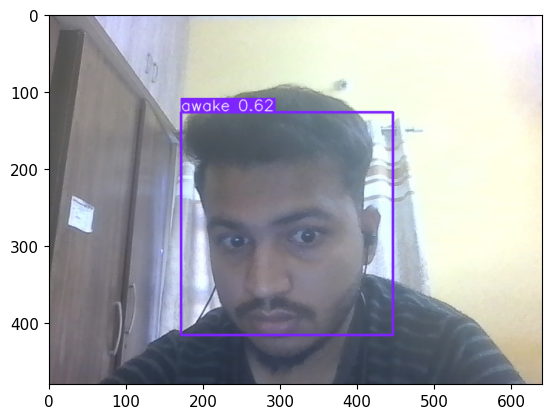

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Suhas S/.cache\torch\hub\ultralytics_yolov5_mas